# <span style="color:red">Continuous Wavelet Spectrum </span>

# Example for sine waves

First written on Nov,19, 2014:  
Author: tmiyama at gmail

# Introduction

Wavelet anaysis tool by Torrence and Compo [1998] is very popular in climatology. However, Liu et al. [2007] has pointed out that the method by Torrence and Compo [1998] has a bias in favor of large scales.  
  
This notebook is the translation of Liu et al.'s matlab test program  
http://ocgweb.marine.usf.edu/~liu/wavelet_test_ElNino3_YLiu.m  
to python.

This notebook use an artificial sine curve for a test correponding to Liu et al. [2007].



__References:__  
  
* Liu, Y., X.S. Liang, and R.H. Weisberg, 2007: Rectification of the bias in the wavelet power spectrum. Journal of Atmospheric and Oceanic Technology, 24(12), 2093-2102. http://ocgweb.marine.usf.edu/~liu/wavelet.html
   
* Torrence, C., and G. P. Compo, 1998: A practical guide to wavelet analysis. Bull. Amer. Meteor. Soc., 79, 6178. http://paos.colorado.edu/research/wavelets/ 

Here is the comment in the original matlab script.

% Rectification of the bias in the Wavelet power spectrum with the data set  
% (Nino3.dat) given by Torrence and Compo (1998).  This code is modified  
% from wavetest.m, the example script provided by Torrence and Compo
% (1998), to demonstrate how to rectify the bias in wavelet power spectrum.  
% This code generates Figure 4 of Liu et al. (2007).  
%  
% Yonggang Liu, 2006.4.12  
%  
% E-mail:  yliu18@gmail.com  
% http://ocgweb.marine.usf.edu/~liu/wavelet.html  
%
% References:  
%
% Liu, Y., X.S. Liang, and R.H. Weisberg, 2007: Rectification of the bias
% in the wavelet power spectrum. Journal of Atmospheric and Oceanic 
% Technology, 24(12), 2093-2102.
%   
% Torrence, C., and G. P. Compo, 1998: A practical guide to wavelet 
% analysis. Bull. Amer. Meteor. Soc., 79, 61�78.
%========================================================================  
% Here starts with the original file header:
  
  
%WAVETEST Example Matlab script for WAVELET, using NINO3 SST dataset  
%  
% See "http://paos.colorado.edu/research/wavelets/"  
% Written January 1998 by C. Torrence  
%  
% Modified Oct 1999, changed Global Wavelet Spectrum (GWS) to be sideways,  
%   changed all "log" to "log2", changed logarithmic axis on GWS  
%   a normal axis.    


# Reading modules and data

__Read usual modules__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

__Read Wavelet module__
This module is the translation from the matlab tools by Torrence and Compo (1998).  
http://paos.colorado.edu/research/wavelets/software.html  

See the bottom of this notebook for the inside of this module.

In [2]:
from wavelet import wavelet

__Construct sine waves__   
Section 5 in Liu et al. [2007]

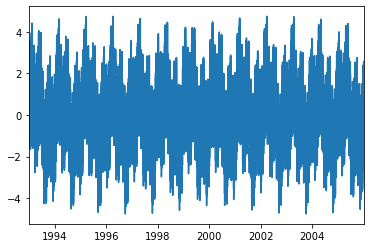

In [3]:
dt=1./24. # 1 hour
t1=1.
t2=8.
t3=32.
t4=128.
t5=365.
n=365*24*13
t=np.arange(n)*dt
pi2=np.pi*2.

#5 sine waves
sst=np.sin(t/t1*pi2)+np.sin(t/t2*pi2)+np.sin(t/t3*pi2)+np.sin(t/t4*pi2)+np.sin(t/t5*pi2) 

time = t/365. + 1993.0   # construct time array
xlim = [time[0],time[-1]]  # plotting range

plt.plot(time,sst)
xrange=plt.xlim(xlim)

# Wavelet Spectrum by Torrence and Compo [1998]

__Set wavelet parameters__

In [4]:
pad = 1      # pad the time series with zeroes (recommended)
dj = 1./8.    # this will do 8 sub-octaves per octave
s0 = 6.*dt    # this says start at a scale of 6hour
j1 = 12./dj    # this says do 12 powers-of-two with dj sub-octaves each
mother = 'Morlet'

__Wavelet transform__

In [5]:
wave,period,scale,coi = wavelet(sst,dt,pad,dj,s0,j1,mother);
power = (np.abs(wave))**2         # compute wavelet power spectrum

__Global wavelet spectrum__ 

In [6]:
global_ws = power.sum(axis=1)/float(n)   # time-average over all times

# Wavelet Spectrum by Liu et al [2007]

<span style="color:red">__Bias rectification__  </span>
  
divided by scales  

In [7]:
########################
#  Spectrum
########################
powers=np.zeros_like(power)
for k in range(len(scale)):
    powers[k,:] = power[k,:]/scale[k]

########################
#  Global Spectrum
########################
global_wss = global_ws/scale   

# PLOT

Corresponding to Fig. 2 in Liu et al. (2007)

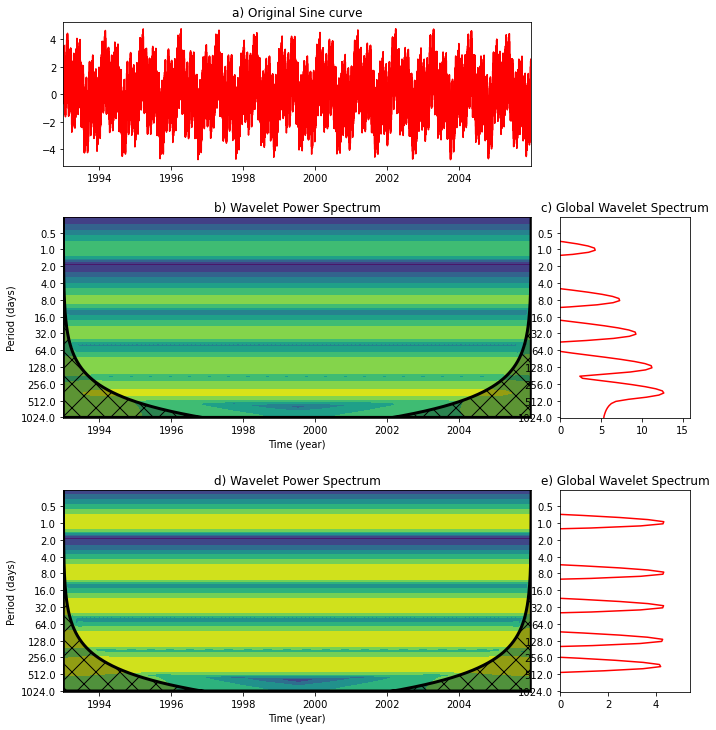

In [10]:
#figure size
fig=plt.figure(figsize=(10,10))

# subplot positions
width= 0.65
height = 0.28;
pos1a = [0.1, 0.75, width, 0.2]
pos1b = [0.1, 0.4, width, height]
pos1c = [0.79, 0.4, 0.18, height]
pos1d = [0.1, 0.02, width, height]
pos1e = [0.79,0.02, 0.18, height]
#########################################
#---- a) Original signal
#########################################
ax=fig.add_axes(pos1a)
ax.plot(time,sst,"r-")
ax.set_ylabel('')
plt.title('a) Original Sine curve')

#########################################
#   b) Wavelet spectrum
#########################################

#--- Contour plot wavelet power spectrum
bx=fig.add_axes(pos1b,sharex=ax) 
Yticks = 2.**(np.arange(np.int(np.log2(np.min(period))),np.int(np.log2(np.max(period)))+1))
bx.contourf(time,np.log2(period),np.log2(power))
bx.set_xlabel('Time (year)')
bx.set_ylabel('Period (days)')
import matplotlib.ticker as ticker
ymajorLocator=ticker.FixedLocator(np.log2(Yticks))
bx.yaxis.set_major_locator( ymajorLocator )
ticks=bx.yaxis.set_ticklabels(Yticks)
plt.title('b) Wavelet Power Spectrum')


# cone-of-influence, anything "below" is dubious
ts = time;
coi_area = np.concatenate([[np.max(scale)], coi, [np.max(scale)],[np.max(scale)]])
ts_area = np.concatenate([[ts[0]], ts, [ts[-1]] ,[ts[0]]]);
L = bx.plot(ts_area,np.log2(coi_area),'k',linewidth=3)
F=bx.fill(ts_area,np.log2(coi_area),'k',alpha=0.3,hatch="x")

#########################################
#   c) Global Wavelet spectrum
#########################################

#--- Plot global wavelet spectrum
cx=fig.add_axes(pos1c,sharey=bx)
cx.plot(np.log2(global_ws),np.log2(period),"r-")
ylim=cx.set_ylim(np.log2([period.min(),period.max()]))
cx.invert_yaxis()
plt.title('c) Global Wavelet Spectrum')
xrangec=cx.set_xlim([0,1.25*np.max(np.log2(global_ws))])

#########################################
#   d) Wavelet spectrum
#########################################

#--- Contour plot wavelet power spectrum
dx=fig.add_axes(pos1d,sharex=ax)
dx.contourf(time,np.log2(period),np.log2(powers))
dx.set_xlabel('Time (year)')
dx.set_ylabel('Period (days)')
ymajorLocator=ticker.FixedLocator(np.log2(Yticks))
dx.yaxis.set_major_locator( ymajorLocator )
dx.yaxis.set_ticklabels(Yticks)
plt.title('d) Wavelet Power Spectrum')


# cone-of-influence, anything "below" is dubios
L = dx.plot(ts_area,np.log2(coi_area),'k',linewidth=3)
F=dx.fill(ts_area,np.log2(coi_area),'k',alpha=0.3,hatch="x")

#########################################
#   e) Global Wavelet spectrum
#########################################

#--- Plot global wavelet spectrum
ex=fig.add_axes(pos1e,sharey=dx)
ex.plot(np.log2(global_wss),np.log2(period),"r-")
ylim=ex.set_ylim(np.log2([period.min(),period.max()]))
ex.invert_yaxis()
plt.title('e) Global Wavelet Spectrum')
xrangec=ex.set_xlim([0,1.25*np.max(np.log2(global_wss))])

#########################################
#   Save fig
#########################################
plt.savefig("wavelet_test_sine.png")

# List of Modules

In [11]:
!cat wavelet.py

def wavelet(Y,dt,pad=0.,dj=0.25,s0=-1,J1=-1,mother="MORLET",param=-1):
    """
This function is the translation of wavelet.m by Torrence and Compo

import wave_bases from wave_bases.py

The following is the original comment in wavelet.m

#WAVELET  1D Wavelet transform with optional singificance testing
%
%   [WAVE,PERIOD,SCALE,COI] = wavelet(Y,DT,PAD,DJ,S0,J1,MOTHER,PARAM)
%
%   Computes the wavelet transform of the vector Y (length N),
%   with sampling rate DT.
%
%   By default, the Morlet wavelet (k0=6) is used.
%   The wavelet basis is normalized to have total energy=1 at all scales.
%
%
% INPUTS:
%
%    Y = the time series of length N.
%    DT = amount of time between each Y value, i.e. the sampling time.
%
% OUTPUTS:
%
%    WAVE is the WAVELET transform of Y. This is a complex array
%    of dimensions (N,J1+1). FLOAT(WAVE) gives the WAVELET amplitude,
%    ATAN(IMAGINARY(WAVE),FLOAT(WAVE) gives the WAVELET phase.
%    The WAVELET power spectrum is ABS(WAVE)^2.
%    Its units are 

In [12]:
!cat wave_bases.py

def wave_bases(mother,k,scale,param):
    """
    This is translation of wave_bases.m by Torrence and Gilbert P. Compo
 
    The folloing is the original README
 
%    WAVE_BASES  1D Wavelet functions Morlet, Paul, or DOG
%
%  [DAUGHTER,FOURIER_FACTOR,COI,DOFMIN] = ...
%      wave_bases(MOTHER,K,SCALE,PARAM);
%
%   Computes the wavelet function as a function of Fourier frequency,
%   used for the wavelet transform in Fourier space.
%   (This program is called automatically by WAVELET)
%
% INPUTS:
%
%    MOTHER = a string, equal to 'MORLET' or 'PAUL' or 'DOG'
%    K = a vector, the Fourier frequencies at which to calculate the wavelet
%    SCALE = a number, the wavelet scale
%    PARAM = the nondimensional parameter for the wavelet function
%
% OUTPUTS:
%
%    DAUGHTER = a vector, the wavelet function
%    FOURIER_FACTOR = the ratio of Fourier period to scale
%    COI = a number, the cone-of-influence size at the scale
%    DOFMIN = a number, degrees of freedom for each point in the wav